# Mapping Quality and Proportion of Mapped Reads for each type of tRNA isodecoder in BAM files

After post-processing of mapped reads after alignment using BWA MEM, the mapping information (reference sequence & MAPQ) are extracted from final BAM files and plotted. 


----------------------------------------------------------------------------------------
- Load required packages

----------------------------------------------------------------------------------------

In [1]:
# load packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# MAPQ: Plotting Mapping Quality

----------------------------------------------------------------------------------------
- Plot mapping quality of reads mapped to different tRNA reference sequences in two sample batches

----------------------------------------------------------------------------------------

In [2]:
tRNA_list = ['tRNA-Gly-GCC-1', 'tRNA-Gly-GCC-2', 'tRNA-Gly-GCC-3','tRNA-Gly-GCC-4','tRNA-Gly-GCC-5','tRNA-Gly-CCC-1','tRNA-Gly-CCC-2','tRNA-Gly-CCC-3']
batch_list = ['chip1','chip2']

df_MAPQ = {}

for tRNA in tRNA_list:
    for batch_number in batch_list:
        
        df_MAPQ['{}_{}'.format(tRNA,batch_number)] = []

In [3]:
batch_list = ['chip1','chip2']
sample_list = ['01','02','03','04','05','06','07','08','09','10','11','12']

df={}

for tRNA in tRNA_list:
    for batch_number in batch_list:
        for sample_number in sample_list:
        
            df['{}.01{}'.format(batch_number,sample_number)] = pd.read_csv('{}.01{}.tRNA_MAPQ_filtered.txt'.format(batch_number,sample_number),sep=' ',header=None)
            df['{}.01{}'.format(batch_number,sample_number)].columns = ['tRNA_isodecoder','MAPQ']
            
            df_MAPQ['{}_{}'.format(tRNA,batch_number)].extend(df['{}.01{}'.format(batch_number,sample_number)][df['{}.01{}'.format(batch_number,sample_number)]['tRNA_isodecoder'] == tRNA]['MAPQ'].tolist())
        

In [4]:
data_group1 = [df_MAPQ['tRNA-Gly-GCC-1_chip1'],df_MAPQ['tRNA-Gly-GCC-2_chip1'],df_MAPQ['tRNA-Gly-GCC-3_chip1'],df_MAPQ['tRNA-Gly-GCC-4_chip1'],df_MAPQ['tRNA-Gly-GCC-5_chip1'],df_MAPQ['tRNA-Gly-CCC-1_chip1'],df_MAPQ['tRNA-Gly-CCC-2_chip1'],df_MAPQ['tRNA-Gly-CCC-3_chip1']]
data_group2 = [df_MAPQ['tRNA-Gly-GCC-1_chip2'],df_MAPQ['tRNA-Gly-GCC-2_chip2'],df_MAPQ['tRNA-Gly-GCC-3_chip2'],df_MAPQ['tRNA-Gly-GCC-4_chip2'],df_MAPQ['tRNA-Gly-GCC-5_chip2'],df_MAPQ['tRNA-Gly-CCC-1_chip2'],df_MAPQ['tRNA-Gly-CCC-2_chip2'],df_MAPQ['tRNA-Gly-CCC-3_chip2']]

/var/folders/8k/q1vmhfqx3q3gj5swd1_m0dw80000gn/T/ipykernel_39725/3968825886.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels_list, rotation=0 )


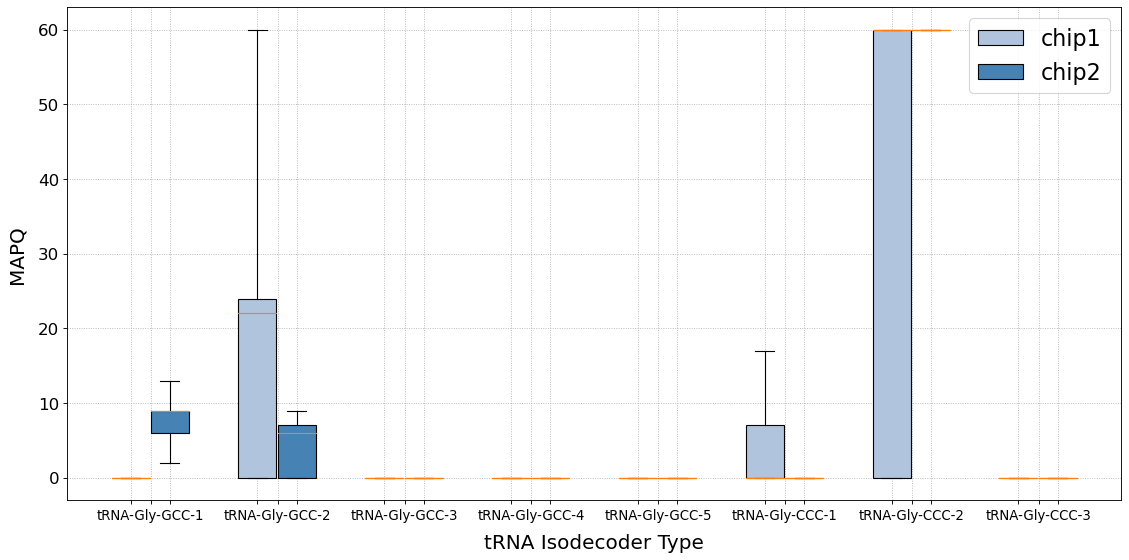

In [251]:
# MAPQ plot
labels_list = ['tRNA-Gly-GCC-1', 'tRNA-Gly-GCC-2', 'tRNA-Gly-GCC-3','tRNA-Gly-GCC-4','tRNA-Gly-GCC-5','tRNA-Gly-CCC-1','tRNA-Gly-CCC-2','tRNA-Gly-CCC-3']
xlocations  = range(len(data_group1))
width       = 0.3
symbol      = ''
# ymin        = 0
# ymax        = 10


positions_group1 = [x-(width+0.01) for x in xlocations]
positions_group2 = xlocations

fig, ax = plt.subplots(figsize=(17, 8), dpi=80)
plt.rc('legend', fontsize=20)    # legend fontsize
plt.rc('ytick', labelsize=15)    # legend fontsize
plt.rc('xtick', labelsize=12)


ax.set_xticklabels(labels_list, rotation=0 )
ax.grid(True, linestyle='dotted')
ax.set_axisbelow(True)
ax.set_xticks([x-0.15 for x in xlocations])
plt.xlabel("tRNA Isodecoder Type",fontsize=18,labelpad=10)
plt.ylabel("MAPQ",fontsize=18,labelpad=10)

bp1 = ax.boxplot(data_group1, 
            sym=symbol,
            labels=['']*len(labels_list),
            positions=positions_group1, 
            widths=width, 
            patch_artist=True, 
            boxprops=dict(facecolor="lightsteelblue")
            )

bp2 = ax.boxplot(data_group2, 
            labels=['']*len(labels_list),
            sym=symbol,
            positions=positions_group2, 
            widths=width, 
            patch_artist=True, 
            boxprops=dict(facecolor="steelblue")
            )

ax.legend([bp1["boxes"][0], bp2["boxes"][0]], ['chip1', 'chip2'], loc='upper right')

plt.savefig('MAPQ.png',dpi=500, bbox_inches='tight')  




# tRNA isodecoder: Plotting proportion of reads mapped to each type of tRNA isodecoder

----------------------------------------------------------------------------------------
- Plot proportion of reads mapped to different tRNA reference sequences in two sample batches

----------------------------------------------------------------------------------------

In [5]:
# import sample data 

batch_list = ['chip1','chip2']
sample_list = ['01','02','03','04','05','06','07','08','09','10','11','12']

df={}
df_tRNA_isodecoder = {}

for batch_number in batch_list:
    for sample_number in sample_list:
        
        df['{}.01{}'.format(batch_number,sample_number)] = pd.read_csv('{}.01{}.tRNA_MAPQ_filtered.txt'.format(batch_number,sample_number),sep=' ',header=None)
        df['{}.01{}'.format(batch_number,sample_number)].columns = ['tRNA_isodecoder','MAPQ']
        
        value_counts = df['{}.01{}'.format(batch_number,sample_number)]['tRNA_isodecoder'].value_counts()
        value_counts_proportion = value_counts/value_counts.sum()
        value_counts_proportion = pd.DataFrame(value_counts_proportion)
        value_counts_proportion = value_counts_proportion.reset_index(level=0)
        value_counts_proportion.columns = ['tRNA_isodecoder','{}.01{}'.format(batch_number,sample_number)]
        
        df_tRNA_isodecoder['{}.01{}'.format(batch_number,sample_number)] = value_counts_proportion

In [6]:
# edit dataframes

df_chip1 = df_tRNA_isodecoder['chip1.0101']
df_chip2 = df_tRNA_isodecoder['chip2.0101']

sample_list = ['02','03','04','05','06','07','08','09','10','11','12']

for sample_number in sample_list:
    
    df_chip1 = pd.merge(df_chip1,df_tRNA_isodecoder['chip1.01{}'.format(sample_number)],on='tRNA_isodecoder')
    df_chip2 = pd.merge(df_chip2,df_tRNA_isodecoder['chip2.01{}'.format(sample_number)],on='tRNA_isodecoder')

In [7]:
df_chip2['mean'] = df_chip2.mean(axis=1)

/var/folders/8k/q1vmhfqx3q3gj5swd1_m0dw80000gn/T/ipykernel_10993/588576306.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_chip2['mean'] = df_chip2.mean(axis=1)


In [8]:
df_chip1['mean'] = df_chip1.mean(axis=1)

/var/folders/8k/q1vmhfqx3q3gj5swd1_m0dw80000gn/T/ipykernel_10993/4122341499.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_chip1['mean'] = df_chip1.mean(axis=1)


In [9]:
df_chip1['STD'] = df_chip1.std(axis=1)
df_chip2['STD'] = df_chip2.std(axis=1)

/var/folders/8k/q1vmhfqx3q3gj5swd1_m0dw80000gn/T/ipykernel_10993/2631042707.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_chip1['STD'] = df_chip1.std(axis=1)
/var/folders/8k/q1vmhfqx3q3gj5swd1_m0dw80000gn/T/ipykernel_10993/2631042707.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_chip2['STD'] = df_chip2.std(axis=1)


In [10]:
order = ['tRNA-Gly-GCC-1', 'tRNA-Gly-GCC-2', 'tRNA-Gly-GCC-3','tRNA-Gly-GCC-4','tRNA-Gly-GCC-5','tRNA-Gly-CCC-1','tRNA-Gly-CCC-2','tRNA-Gly-CCC-3']
df_chip1['tRNA_isodecoder_order'] = df_chip1['tRNA_isodecoder'].map(lambda x: order.index(x))

In [11]:
df_chip1 = df_chip1.sort_values(by=['tRNA_isodecoder_order'])

In [12]:
df_chip2['tRNA_isodecoder_order'] = df_chip2['tRNA_isodecoder'].map(lambda x: order.index(x))
df_chip2 = df_chip2.sort_values(by=['tRNA_isodecoder_order'])

In [13]:
df_chip1

,tRNA_isodecoder,chip1.0101,chip1.0102,chip1.0103,chip1.0104,chip1.0105,chip1.0106,chip1.0107,chip1.0108,chip1.0109,chip1.0110,chip1.0111,chip1.0112,mean,STD,tRNA_isodecoder_order
1,tRNA-Gly-GCC-1,0.121577,0.057790,0.019064,0.048545,0.021668,0.054597,0.095120,0.059866,0.090072,0.058989,0.025687,0.036668,0.057470,0.030119,0
0,tRNA-Gly-GCC-2,0.512000,0.393606,0.754914,0.510051,0.766772,0.367702,0.410347,0.364733,0.384412,0.340173,0.691174,0.493296,0.499098,0.149175,1
4,tRNA-Gly-GCC-3,0.065343,0.057672,0.048757,0.045967,0.037353,0.056962,0.086856,0.065714,0.089526,0.058973,0.056269,0.040804,0.059183,0.015493,2
7,tRNA-Gly-GCC-4,0.018199,0.019538,0.003089,0.016121,0.002679,0.019880,0.025437,0.022593,0.023834,0.018805,0.004999,0.020278,0.016288,0.007728,3
6,tRNA-Gly-GCC-5,0.063343,0.057020,0.048687,0.045367,0.036609,0.055754,0.085842,0.064768,0.088844,0.057630,0.055189,0.039598,0.058221,0.015429,4
3,tRNA-Gly-CCC-1,0.074652,0.099256,0.059729,0.071240,0.051194,0.099920,0.117176,0.093567,0.112346,0.090462,0.069070,0.116103,0.087893,0.021430,5
2,tRNA-Gly-CCC-2,0.079852,0.257354,0.017897,0.216790,0.045717,0.288842,0.092491,0.263486,0.121533,0.316329,0.042490,0.213149,0.162994,0.102751,6
5,tRNA-Gly-CCC-3,0.065034,0.057765,0.047862,0.045919,0.038008,0.056344,0.086732,0.065273,0.089433,0.058640,0.055122,0.040104,0.058853,0.015512,7


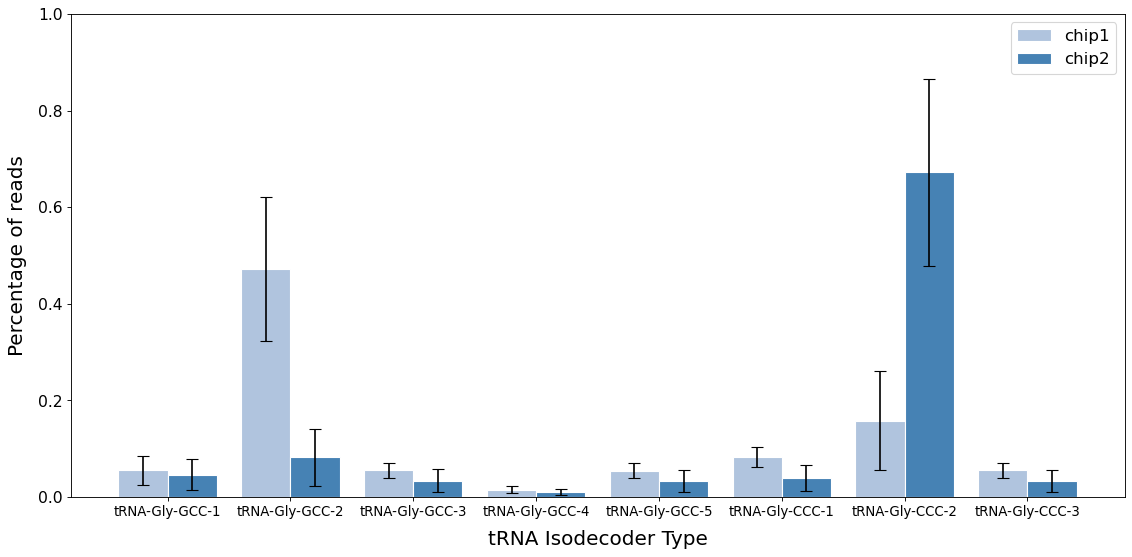

In [136]:
# plot 1

# set width of bars
barWidth = 0.4
 
plt.figure(figsize=(17, 8), dpi=80)
plt.rc('legend', fontsize=15)    # legend fontsize
plt.rc('ytick', labelsize=14)    # legend fontsize
plt.rc('xtick', labelsize=12) 

# Set position of bar on X axis
r1 = np.arange(8)
r2 = [x + barWidth for x in r1]
 
# Make the plot
plt.bar(r1, df_chip1['mean'], yerr=df_chip1['STD'], color='lightsteelblue', width=barWidth, edgecolor='white', label='chip1', capsize=5)
plt.bar(r2, df_chip2['mean'], yerr=df_chip2['STD'], color='steelblue', width=barWidth, edgecolor='white', label='chip2',capsize=5)
 
# Add xticks on the middle of the group bars
plt.xlabel("tRNA Isodecoder Type",fontsize=18,labelpad=10)
plt.ylabel("Percentage of reads",fontsize=18,labelpad=10)

plt.xticks([r + 0.2 for r in range(8)], ['tRNA-Gly-GCC-1', 'tRNA-Gly-GCC-2', 'tRNA-Gly-GCC-3','tRNA-Gly-GCC-4','tRNA-Gly-GCC-5','tRNA-Gly-CCC-1','tRNA-Gly-CCC-2','tRNA-Gly-CCC-3'])
plt.ylim(0,1)
    
# Create legend & Show graphic
plt.legend(loc='upper right')
plt.savefig('tRNA_isodecoder_plot_1.png',dpi=500, bbox_inches='tight')
plt.show()

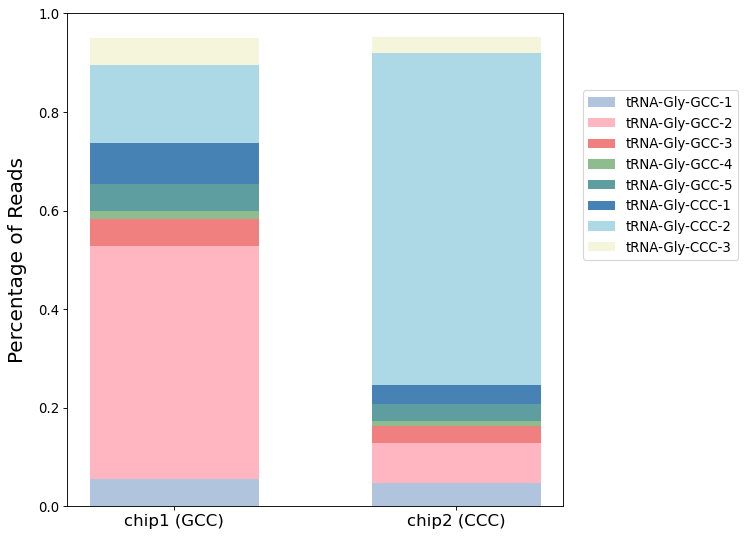

In [191]:
# stacked bar plot
tRNA_isodecoder = ('chip1 (GCC)', 'chip2 (CCC)')

weight_counts = {
    "tRNA-Gly-GCC-1": np.array([0.055366,0.046736]),
    "tRNA-Gly-GCC-2": np.array([0.472181,0.082081]),
    "tRNA-Gly-GCC-3": np.array([0.055822,0.034320]),
    "tRNA-Gly-GCC-4": np.array([0.015629,0.010700]),
    "tRNA-Gly-GCC-5": np.array([0.054929,0.033609]),
    "tRNA-Gly-CCC-1": np.array([0.082780,0.039327]),
    "tRNA-Gly-CCC-2": np.array([0.158360,0.672081]),
    "tRNA-Gly-CCC-3": np.array([0.055519,0.033973])
}

Colour = ['lightsteelblue','lightpink','lightcoral','darkseagreen','cadetblue','steelblue','lightblue','beige']

width = 0.6

fig, ax = plt.subplots(figsize=(8, 8), dpi=80)

bottom = np.zeros(2)

plt.rc('legend', fontsize=12)    # legend fontsize
plt.rc('ytick', labelsize=12)    # legend fontsize
plt.rc('xtick', labelsize=15) 

i=0

for boolean, weight_count in weight_counts.items():
    p = ax.bar(tRNA_isodecoder, weight_count, width, label=boolean, bottom=bottom, color=Colour[i])
    bottom += weight_count
    i += 1

ax.legend(loc=(1.04, 0.5))
plt.ylim(0,1)

plt.ylabel("Percentage of Reads",fontsize=18,labelpad=10)
plt.savefig('tRNA_isodecoder_plot_2.png',dpi=500, bbox_inches='tight')
plt.show()

# Plots for alignment to complete list of cyto-encoded tRNAs and mitochondrial tRNAs

In [14]:
# import sample data 

batch_list = ['chip1','chip2']
sample_list = ['01','02','03','04','05','06','07','08','09','10','11','12']

df={}
df_tRNA_isodecoder = {}

for batch_number in batch_list:
    for sample_number in sample_list:
        
        df['{}.01{}'.format(batch_number,sample_number)] = pd.read_csv('{}.01{}_complete.tRNA_MAPQ_filtered.txt'.format(batch_number,sample_number),sep=' ',header=None)
        df['{}.01{}'.format(batch_number,sample_number)].columns = ['tRNA_isodecoder','MAPQ']
        
        value_counts = df['{}.01{}'.format(batch_number,sample_number)]['tRNA_isodecoder'].value_counts()
        value_counts_proportion = value_counts/value_counts.sum()
        value_counts_proportion = pd.DataFrame(value_counts_proportion)
        value_counts_proportion = value_counts_proportion.reset_index(level=0)
        value_counts_proportion.columns = ['tRNA_isodecoder','{}.01{}'.format(batch_number,sample_number)]
        
        df_tRNA_isodecoder['{}.01{}'.format(batch_number,sample_number)] = value_counts_proportion

In [15]:
Top_tRNA_list = []

for batch_number in batch_list:
    for sample_number in sample_list:
        Top_tRNA_list.extend(df_tRNA_isodecoder['{}.01{}'.format(batch_number,sample_number)][0:10]['tRNA_isodecoder'].tolist())

In [16]:
Top_tRNA_list = list(set(Top_tRNA_list))

In [17]:
Top_tRNA_list.sort()

In [18]:
for batch_number in batch_list:
    for sample_number in sample_list:
        df_tRNA_isodecoder['{}.01{}'.format(batch_number,sample_number)] = df_tRNA_isodecoder['{}.01{}'.format(batch_number,sample_number)].loc[df_tRNA_isodecoder['{}.01{}'.format(batch_number,sample_number)]['tRNA_isodecoder'].isin(Top_tRNA_list)]

In [19]:
for batch_number in batch_list:
    for sample_number in sample_list:
        df_tRNA_isodecoder['{}.01{}'.format(batch_number,sample_number)]['tRNA_isodecoder'][df_tRNA_isodecoder['{}.01{}'.format(batch_number,sample_number)]['tRNA_isodecoder'] == 'tdbD00002857|Homo_sapiens|9606|Ser|TGA'] = 'mt-tRNA-Ser-TGA-1'  
        df_tRNA_isodecoder['{}.01{}'.format(batch_number,sample_number)]['tRNA_isodecoder'][df_tRNA_isodecoder['{}.01{}'.format(batch_number,sample_number)]['tRNA_isodecoder'] == 'tdbD00002375|Homo_sapiens|9606|Gln|TTG'] = 'mt-tRNA-Gln-TTG-1'
        df_tRNA_isodecoder['{}.01{}'.format(batch_number,sample_number)]['tRNA_isodecoder'][df_tRNA_isodecoder['{}.01{}'.format(batch_number,sample_number)]['tRNA_isodecoder'] == 'tdbD00000638|Homo_sapiens|9606|Glu|TTG'] = 'mt-tRNA-Glu-TTG-1'

/var/folders/8k/q1vmhfqx3q3gj5swd1_m0dw80000gn/T/ipykernel_10993/1950682198.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tRNA_isodecoder['{}.01{}'.format(batch_number,sample_number)]['tRNA_isodecoder'][df_tRNA_isodecoder['{}.01{}'.format(batch_number,sample_number)]['tRNA_isodecoder'] == 'tdbD00002375|Homo_sapiens|9606|Gln|TTG'] = 'mt-tRNA-Gln-TTG-1'
/var/folders/8k/q1vmhfqx3q3gj5swd1_m0dw80000gn/T/ipykernel_10993/1950682198.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tRNA_isodecoder['{}.01{}'.format(batch_number,sample_number)]['tRNA_isodecoder'][df_tRNA_isodecoder['{}.01{}'.format(batch_number,sa

In [20]:
df_tRNA_isodecoder['chip1.0101']

,tRNA_isodecoder,chip1.0101
0,tRNA-Gly-GCC-2-1,0.444206
1,tRNA-Gly-TCC-2-1,0.157443
2,tRNA-Gly-GCC-1-1,0.103630
3,tRNA-Glu-CTC-1-1,0.066567
4,tRNA-Glu-CTC-2-1,0.065514
5,tRNA-Gly-TCC-3-1,0.056738
6,tRNA-Gly-TCC-1-1,0.048345
7,tRNA-Gly-CCC-2-1,0.037135
8,tRNA-Gly-CCC-1-1,0.010374
9,tRNA-Glu-TTC-3-1,0.003361


In [21]:
# edit dataframes

df_chip1 = df_tRNA_isodecoder['chip1.0101']
df_chip2 = df_tRNA_isodecoder['chip2.0101']

sample_list = ['02','03','04','05','06','07','08','09','10','11','12']

for sample_number in sample_list:
    
    df_chip1 = pd.merge(df_chip1,df_tRNA_isodecoder['chip1.01{}'.format(sample_number)],on='tRNA_isodecoder')
    df_chip2 = pd.merge(df_chip2,df_tRNA_isodecoder['chip2.01{}'.format(sample_number)],on='tRNA_isodecoder')

In [22]:
df_chip2['mean'] = df_chip2.mean(axis=1)
df_chip1['mean'] = df_chip1.mean(axis=1)
df_chip1['STD'] = df_chip1.std(axis=1)
df_chip2['STD'] = df_chip2.std(axis=1)

/var/folders/8k/q1vmhfqx3q3gj5swd1_m0dw80000gn/T/ipykernel_10993/1246687431.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_chip2['mean'] = df_chip2.mean(axis=1)
/var/folders/8k/q1vmhfqx3q3gj5swd1_m0dw80000gn/T/ipykernel_10993/1246687431.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_chip1['mean'] = df_chip1.mean(axis=1)
/var/folders/8k/q1vmhfqx3q3gj5swd1_m0dw80000gn/T/ipykernel_10993/1246687431.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_chip1['STD'] = df_chi

In [23]:
df_chip1['tRNA_isodecoder'] = df_chip1['tRNA_isodecoder'].str.replace(r'-1$', '')

/var/folders/8k/q1vmhfqx3q3gj5swd1_m0dw80000gn/T/ipykernel_10993/823197037.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_chip1['tRNA_isodecoder'] = df_chip1['tRNA_isodecoder'].str.replace(r'-1$', '')


In [24]:
df_chip2['tRNA_isodecoder'] = df_chip2['tRNA_isodecoder'].str.replace(r'-1$', '')

/var/folders/8k/q1vmhfqx3q3gj5swd1_m0dw80000gn/T/ipykernel_10993/1692924536.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_chip2['tRNA_isodecoder'] = df_chip2['tRNA_isodecoder'].str.replace(r'-1$', '')


In [25]:
Top_tRNA_list

['tRNA-Asp-GTC-2-1',
 'tRNA-Glu-CTC-1-1',
 'tRNA-Glu-CTC-2-1',
 'tRNA-Glu-TTC-3-1',
 'tRNA-Gly-CCC-1-1',
 'tRNA-Gly-CCC-2-1',
 'tRNA-Gly-GCC-1-1',
 'tRNA-Gly-GCC-2-1',
 'tRNA-Gly-TCC-1-1',
 'tRNA-Gly-TCC-2-1',
 'tRNA-Gly-TCC-3-1',
 'tRNA-Val-CAC-3-1',
 'tdbD00000638|Homo_sapiens|9606|Glu|TTG',
 'tdbD00002375|Homo_sapiens|9606|Gln|TTG',
 'tdbD00002857|Homo_sapiens|9606|Ser|TGA']

In [26]:
df_chip1

,tRNA_isodecoder,chip1.0101,chip1.0102,chip1.0103,chip1.0104,chip1.0105,chip1.0106,chip1.0107,chip1.0108,chip1.0109,chip1.0110,chip1.0111,chip1.0112,mean,STD
0,tRNA-Gly-GCC-2,0.444206,0.332946,0.704414,0.461536,0.728127,0.308208,0.318541,0.294563,0.290820,0.278131,0.633029,0.449397,0.436993,0.159124
1,tRNA-Gly-TCC-2,0.157443,0.167850,0.133362,0.132752,0.116882,0.160369,0.233229,0.167042,0.234302,0.153092,0.143520,0.111631,0.159290,0.037600
2,tRNA-Gly-GCC-1,0.103630,0.037619,0.016005,0.032146,0.019366,0.034133,0.069042,0.036787,0.065976,0.039736,0.020975,0.016319,0.040978,0.025153
3,tRNA-Glu-CTC-1,0.066567,0.040360,0.007077,0.030753,0.006247,0.042943,0.075271,0.052084,0.064309,0.040292,0.012695,0.047696,0.040525,0.021996
4,tRNA-Glu-CTC-2,0.065514,0.040248,0.007054,0.030656,0.007616,0.043081,0.075448,0.052249,0.064243,0.040544,0.012473,0.047401,0.040544,0.021767
5,tRNA-Gly-TCC-3,0.056738,0.053339,0.031700,0.042607,0.022430,0.050106,0.072891,0.057929,0.076656,0.050798,0.030129,0.026503,0.047652,0.016796
6,tRNA-Gly-TCC-1,0.048345,0.063416,0.082290,0.056745,0.047062,0.056861,0.057545,0.061256,0.060830,0.053635,0.091726,0.060128,0.061653,0.012432
7,tRNA-Gly-CCC-2,0.037135,0.173924,0.004542,0.151976,0.032426,0.213819,0.029712,0.190902,0.065964,0.260681,0.032254,0.136251,0.110799,0.083385
8,tRNA-Gly-CCC-1,0.010374,0.041867,0.011471,0.025729,0.014904,0.043651,0.030684,0.028569,0.023033,0.031995,0.013850,0.076397,0.029377,0.017715
9,tRNA-Glu-TTC-3,0.003361,0.002465,0.000342,0.002304,0.000387,0.003047,0.004952,0.005891,0.003782,0.002500,0.003102,0.004549,0.003057,0.001586


In [27]:
order = ['tRNA-Asp-GTC-2', 'tRNA-Glu-CTC-1', 'tRNA-Glu-CTC-2', 'tRNA-Glu-TTC-3', 'tRNA-Gly-CCC-1', 'tRNA-Gly-CCC-2',
        'tRNA-Gly-GCC-1', 'tRNA-Gly-GCC-2', 'tRNA-Gly-TCC-1', 'tRNA-Gly-TCC-2', 'tRNA-Gly-TCC-3', 'tRNA-Val-CAC-3',
        'mt-tRNA-Ser-TGA', 'mt-tRNA-Glu-TTG', 'mt-tRNA-Gln-TTG']
df_chip1['tRNA_isodecoder_order'] = df_chip1['tRNA_isodecoder'].map(lambda x: order.index(x))
df_chip1 = df_chip1.sort_values(by=['tRNA_isodecoder_order'])
df_chip2['tRNA_isodecoder_order'] = df_chip2['tRNA_isodecoder'].map(lambda x: order.index(x))
df_chip2 = df_chip2.sort_values(by=['tRNA_isodecoder_order'])

In [28]:
df_chip2.drop(df_chip2[df_chip2['tRNA_isodecoder'] == 'tRNA-Val-CAC-3'].index, inplace = True)

In [29]:
df_chip1

,tRNA_isodecoder,chip1.0101,chip1.0102,chip1.0103,chip1.0104,chip1.0105,chip1.0106,chip1.0107,chip1.0108,chip1.0109,chip1.0110,chip1.0111,chip1.0112,mean,STD,tRNA_isodecoder_order
11,tRNA-Asp-GTC-2,0.001108,0.006312,0.000428,0.004464,0.000149,0.005562,0.004628,0.012179,0.007670,0.006009,0.002126,0.008657,0.004941,0.003456,0
3,tRNA-Glu-CTC-1,0.066567,0.040360,0.007077,0.030753,0.006247,0.042943,0.075271,0.052084,0.064309,0.040292,0.012695,0.047696,0.040525,0.021996,1
4,tRNA-Glu-CTC-2,0.065514,0.040248,0.007054,0.030656,0.007616,0.043081,0.075448,0.052249,0.064243,0.040544,0.012473,0.047401,0.040544,0.021767,2
9,tRNA-Glu-TTC-3,0.003361,0.002465,0.000342,0.002304,0.000387,0.003047,0.004952,0.005891,0.003782,0.002500,0.003102,0.004549,0.003057,0.001586,3
8,tRNA-Gly-CCC-1,0.010374,0.041867,0.011471,0.025729,0.014904,0.043651,0.030684,0.028569,0.023033,0.031995,0.013850,0.076397,0.029377,0.017715,4
7,tRNA-Gly-CCC-2,0.037135,0.173924,0.004542,0.151976,0.032426,0.213819,0.029712,0.190902,0.065964,0.260681,0.032254,0.136251,0.110799,0.083385,5
2,tRNA-Gly-GCC-1,0.103630,0.037619,0.016005,0.032146,0.019366,0.034133,0.069042,0.036787,0.065976,0.039736,0.020975,0.016319,0.040978,0.025153,6
0,tRNA-Gly-GCC-2,0.444206,0.332946,0.704414,0.461536,0.728127,0.308208,0.318541,0.294563,0.290820,0.278131,0.633029,0.449397,0.436993,0.159124,7
6,tRNA-Gly-TCC-1,0.048345,0.063416,0.082290,0.056745,0.047062,0.056861,0.057545,0.061256,0.060830,0.053635,0.091726,0.060128,0.061653,0.012432,8
1,tRNA-Gly-TCC-2,0.157443,0.167850,0.133362,0.132752,0.116882,0.160369,0.233229,0.167042,0.234302,0.153092,0.143520,0.111631,0.159290,0.037600,9


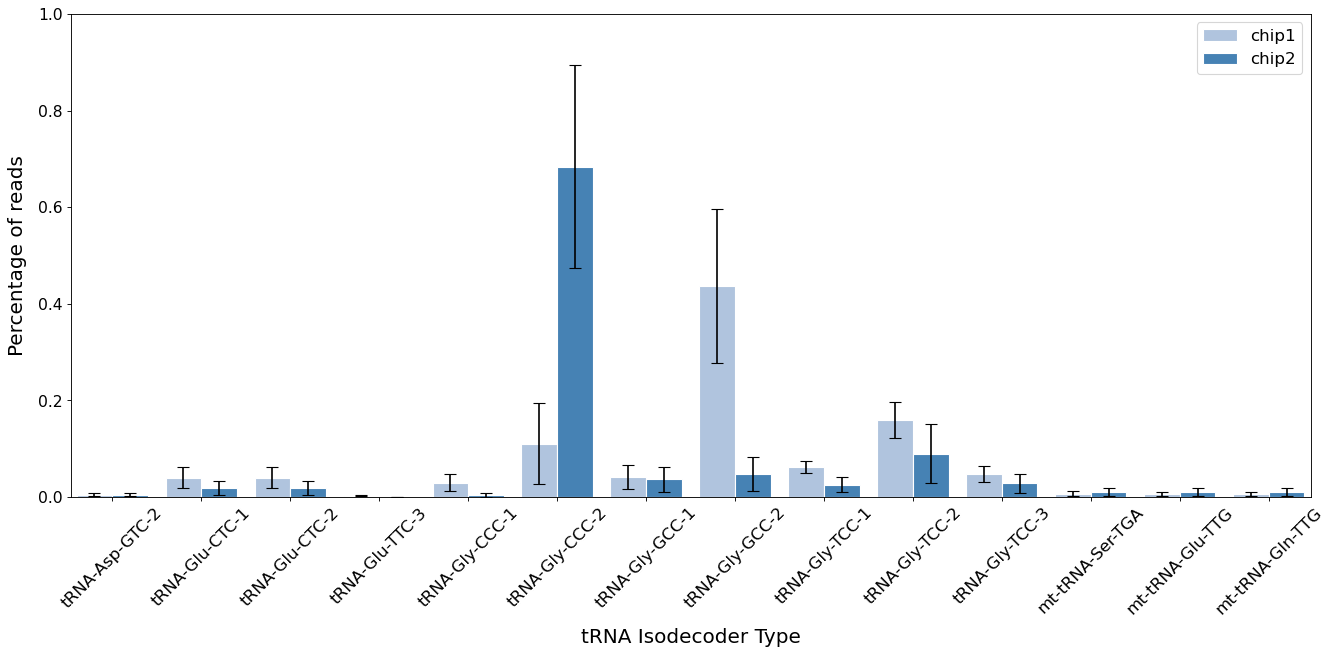

In [30]:
order = ['tRNA-Asp-GTC-2', 'tRNA-Glu-CTC-1', 'tRNA-Glu-CTC-2', 'tRNA-Glu-TTC-3', 'tRNA-Gly-CCC-1', 'tRNA-Gly-CCC-2',
        'tRNA-Gly-GCC-1', 'tRNA-Gly-GCC-2', 'tRNA-Gly-TCC-1', 'tRNA-Gly-TCC-2', 'tRNA-Gly-TCC-3',
        'mt-tRNA-Ser-TGA', 'mt-tRNA-Glu-TTG', 'mt-tRNA-Gln-TTG']

barWidth = 0.4
 
plt.figure(figsize=(20, 8), dpi=80)
plt.rc('legend', fontsize=15)    # legend fontsize
plt.rc('ytick', labelsize=14)    # legend fontsize
plt.rc('xtick', labelsize=15) 
plt.rcParams['axes.xmargin'] = 0.005

# Set position of bar on X axis
r1 = np.arange(14)
r2 = [x + barWidth for x in r1]
 
# Make the plot
plt.bar(r1, df_chip1['mean'], yerr=df_chip1['STD'], color='lightsteelblue', width=barWidth, edgecolor='white', label='chip1', capsize=5)
plt.bar(r2, df_chip2['mean'], yerr=df_chip2['STD'], color='steelblue', width=barWidth, edgecolor='white', label='chip2',capsize=5)
 
# Add xticks on the middle of the group bars
plt.xlabel("tRNA Isodecoder Type",fontsize=18,labelpad=10)
plt.ylabel("Percentage of reads",fontsize=18,labelpad=10)

plt.xticks([r + 0.2 for r in range(14)], order, rotation=45)
plt.ylim(0,1)
    
# Create legend & Show graphic
plt.legend(loc='upper right')
plt.savefig('tRNA_isodecoder_plot_complete_presentation.png',dpi=500, bbox_inches='tight')
plt.show()